# The Perceptron
Let us implement a perceptron.
As a reminder, our perceptron takes multiple inputs, weights each of them with a certain factor and checks if the sum is bigger than a threshold.
![Perceptron](./images/perceptron.png)
First we are going to collect the data to run this example:

In [1]:
! wget -c --retry-connrefused --tries=0 https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip -O ~/data/workshop_data/occupancy_data.zip
! unzip ~/data/workshop_data/occupancy_data.zip -d ~/data/workshop_data/occupancy_data

--2019-03-01 12:08:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/zip]
Saving to: ‘/home/jendrik/data/workshop_data/occupancy_data.zip’

/home/jendrik/data/ 100%[===================>] 327.84K   334KB/s    in 1.0s    

2019-03-01 12:08:22 (334 KB/s) - ‘/home/jendrik/data/workshop_data/occupancy_data.zip’ saved [335713/335713]

Archive:  /home/jendrik/data/workshop_data/occupancy_data.zip
  inflating: /home/jendrik/data/workshop_data/occupancy_data/datatest.txt  
  inflating: /home/jendrik/data/workshop_data/occupancy_data/datatest2.txt  
  inflating: /home/jendrik/data/workshop_data/occupancy_data/datatraining.txt  


In [1]:
# Let's start by importing the relevant packages
# matplotlib for plots
import matplotlib as mpl
from matplotlib import pyplot as plt
# pandas to read in some data
import pandas as pd
# numpy to build our first perceptron
import numpy as np
# Train test split to do validate our findings from the perceptron training
from sklearn.model_selection import train_test_split
# MinMaxScaler to normalise the data before inputting them to the perceptron
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 9)
import os

home = os.path.expanduser("~")
data = home + '/data/workshop_data/occupancy_data/datatraining.txt'

## Occupancy Detection Dataset
For training the perceptron we will utilise the [occupancy detection dataset](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html?task=&area=&type=ts&view=table). It contatins experimental data for binary classification  if a person or not is in a room given temperature, humidity, light and CO$_2$.
	


In [2]:
# Load the occupancy data so we have something to predict
df = pd.read_csv(data)
target = 'Occupancy'
features = [col for col in df.columns if target not in col and 'date' not in col]
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [24]:
print(df.min(), df.max())

date             2015-02-04 17:51:00
Temperature                       19
Humidity                      16.745
Light                              0
CO2                           412.75
HumidityRatio             0.00267413
Occupancy                          0
dtype: object date             2015-02-10 09:33:00
Temperature                    23.18
Humidity                     39.1175
Light                        1546.33
CO2                           2028.5
HumidityRatio             0.00647601
Occupancy                          1
dtype: object


We will normalize the data to be in a range from 0 to 1. This makes sure that all weights are in the same order of magnitude. Otherwise the perceptron would need to learn the range of the data first and then how to separate the data best.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target])
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Build the perceptron
To build and train a perceptron we have to perform three steps:
- Calculate the perceptron's output $\hat{y} = \left(\sum_i w_i X_i \geq 0\right)$ (this can be done in numpy using np.dot [docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html))
- Determine the update for the weights using the error and the learning rate: $\partial w_i = \alpha (y-\hat{y}) X_i$
- Calculate new weights as: $w_i \leftarrow w_i + \partial w_i$
- Repeat the above steps until there occur no more updates (we will iterate once over the dataset instead)

In [4]:
# initializes weights
w = np.random.rand(len(features))
print("initial weights: {}".format(w))
# set a learning rare
alpha = 1e-2

initial weights: [0.61155562 0.07835792 0.57485598 0.54876456 0.17497983]


In [5]:
def calculate_perceptron_output(w, x):
    # Calculate the perceptrons output using 
    # np.dot(w, x) to calculate the sum and
    # thresholding the output:
    # solution: (np.dot(w, x) >= 0).astype(float)
    return (np.dot(w, x) >= 0).astype(float)

In [8]:
for x, y in zip(x_train, y_train.values):
    y_hat = calculate_perceptron_output(w, x)
    error = y - unit_step(y_hat)
    # calculate delta_w
    delta_w = alpha * (y-y_hat) * x
    # update w
    w += delta_w

In [9]:
results=[]
expected=[]
for x in x_train:
    results.append(calculate_perceptron_output(w, x))
results = np.array(results)
expected = np.array(y_train.values)
print("final weights: {}".format(w))

final weights: [-0.22865703 -0.13421023  0.48953436  0.35770484 -0.00195397]


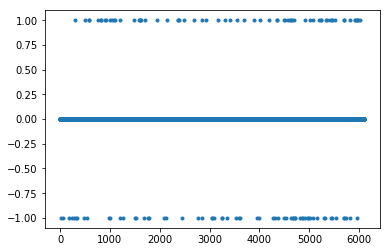

In [10]:
plt.plot(expected-results, marker='.', ls='')

In [11]:
print("accuracy: {}".format(np.mean(results == expected)))

accuracy: 0.9787129523497625


## Let us change to PyTorch

In [12]:
from torch import nn
import torch

Replace the calls to numpy with calls to torch and convert numpy arrays to torch tensors using torch_arr = torch.from_numpy(arr)

In [17]:
def calculate_perceptron_output_torch(w, x):
    # Calculate the perceptrons output using 
    # np.dot(w, x) to calculate the sum and
    # thresholding the output:
    # solution: (np.dot(w, x) >= 0).astype(float)
    return torch.dot(w, x) >= 0

In [18]:

w = torch.from_numpy(np.random.rand(len(features)))
alpha = torch.from_numpy(np.array(alpha))
print("initial weights: {}".format(w))
x_ttrain = torch.from_numpy(x_train)
y_ttrain = torch.from_numpy(y_train.values)
for x, y in zip(x_ttrain, y_ttrain):
    y_hat = calculate_perceptron_output_torch(w, x)
    error = y - y_hat
    w += alpha * error * x
print("final weights: {}".format(w))

initial weights: tensor([0.4392, 0.9770, 0.8696, 0.6408, 0.9522], dtype=torch.float64)
final weights: tensor([-0.3995, -0.1718,  0.7742,  0.4164,  0.1130], dtype=torch.float64)


In [22]:
results=[]
expected=[]
for x, y in zip(x_ttrain, y_ttrain):
    result = calculate_perceptron_output_torch(w, x)
    expected.append(y)
    results.append(result)
results = torch.stack(results)
expected = torch.stack(expected)
print("weights: {}".format(w))
print("accuracy: {}".format((results == expected.byte()).float().mean()))

weights: tensor([-0.3995, -0.1718,  0.7742,  0.4164,  0.1130], dtype=torch.float64)
accuracy: 0.9847715497016907


Text(0, 0.5, 'Light')

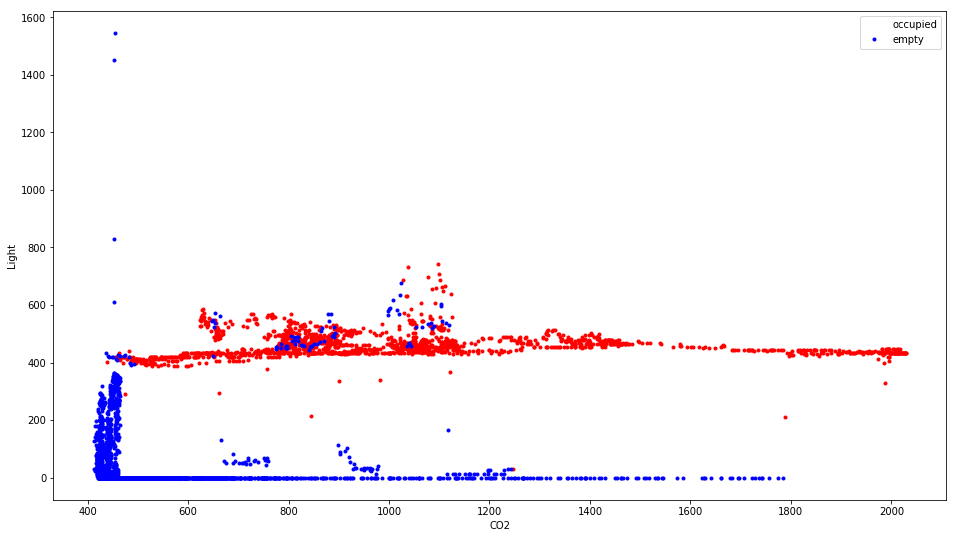

In [15]:
ax = df[df.Occupancy==1].plot(x='CO2', y='Light', ls='', marker='o', ms=3, color='r', label='occupied')
df[df.Occupancy==0].plot(x='CO2', y='Light', ls='', marker='o', ms=3, color='b', ax=ax, label='empty')
ax.set_ylabel('Light')